<a href="https://colab.research.google.com/github/SotoHisakawa/hello-world/blob/main/Analysis_Q_value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##import

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from collections import defaultdict
import random
import statistics
import seaborn as sns
import csv
from collections import Counter

##load file

In [ ]:
#Q_propose_matrix = np.loadtxt("Q_propose_matrix.csv", delimiter=",")
#Q_respond_matrix = np.loadtxt("Q_respond_matrix.csv", delimiter=",")
Q_value_matrix = np.loadtxt("Q_value_matrix.csv", delimiter=",")

##settings

#####define choice

In [ ]:
def use_needs_and_number_2(needs, number):
    result = math.ceil(needs/number) + 2
    return result

def use_needs_and_number_1(needs, number):
    result = math.ceil(needs/number) + 1
    return result

def use_needs_and_number_0(needs, number):
    result = math.ceil(needs/number) + 0
    return result

def use_needs_and_number_minus1(needs, number):
    result = math.ceil(needs/number) - 1
    return result

def use_only_needs_devide_2(needs, number):
    result = math.ceil(needs/2)
    return result

def use_no_information_10(needs, number):
    result = 10
    return result

def use_no_information_9(needs, number):
    result = 9
    return result

def use_no_information_8(needs, number):
    result = 8
    return result

def use_no_information_7(needs, number):
    result = 7
    return result

def use_no_information_6(needs, number):
    result = 6
    return result

def use_no_information_5(needs, number):
    result = 5
    return result

def use_no_information_4(needs, number):
    result = 4
    return result

def use_no_information_3(needs, number):
    result = 3
    return result

def use_no_information_2(needs, number):
    result = 2
    return result

def use_no_information_1(needs, number):
    result = 1
    return result

###decide_choice_of_action

In [ ]:
treat_level = True
if False:
    choice_of_quantity = [
        use_needs_and_number_2,
        use_needs_and_number_1,
        use_only_needs_devide_2,
        use_no_information_3,
        use_no_information_2,
        use_no_information_1
    ]
else:
    choice_of_quantity = [
        use_no_information_1,
        use_no_information_2,
        use_no_information_3,
        use_no_information_4,
        use_no_information_5,
        use_no_information_6,
        use_no_information_7,
        use_no_information_8,
        use_no_information_9,
        use_no_information_10
    ]


In [ ]:
print(use_needs_and_number_1(3,1))

4


##function

In [ ]:
def calculate_step_for_Q_propose_matrix(state_value):
    step = state_value % 21
    return step

def calculate_needs_for_Q_propose_matrix(state_value):
    step = state_value % 21
    needs = ((state_value - step) // 21) % 13
    return needs

def calculate_level_for_Q_propose_matrix(state_value):
    step = state_value % 21
    needs = ((state_value - step) // 21) % 13
    level = (state_value - step - step * 21) // 273
    return level

def calculate_unit_price_value_for_Q_propose_matrix(act_value):
    unit_price_value = act_value % 2
    return unit_price_value

def calculate_quantity_for_Q_propose_matrix(act_value):
    unit_price_value = act_value % 2
    if act_value != 20:
        quantity = (act_value - unit_price_value) % 10
    else:
        quantity = -1
    return quantity


def calculate_step_for_Q_respond_matrix(state_value):
    step = state_value % 21
    return step

def calculate_needs_for_Q_respond_matrix(state_value):
    step = state_value % 21
    needs = ((state_value - step) // 21) % 13
    return needs

def calculate_unit_price_value_for_Q_respond_matrix(state_value):
    step = state_value % 21
    needs = ((state_value - step) // 21) % 13
    unit_price_value = ((state_value - step - step * 21) // 273) % 2
    return unit_price_value

def calculate_quantity_for_Q_respond_matrix(state_value):
    step = state_value % 21
    needs = ((state_value - step) // 21) % 13
    unit_price_value = ((state_value - step - step * 21) // 273) % 2
    quantity = ((state_value - step - step * 21 - unit_price_value * 273) // 546) % 10
    return quantity

def calculate_level_for_Q_respond_matrix(state_value):
    step = state_value % 21
    needs = ((state_value - step) // 21) % 13
    unit_price_value = ((state_value - step - step * 21) // 273) % 2
    quantity = ((state_value - step - step * 21 - unit_price_value * 273) // 546) % 10
    level = (state_value - step - step * 21 - unit_price_value * 273 - quantity * 546) // 5460
    return level


def calculate_step_for_Q_value_matrix(state_value):
    step = state_value % 21
    return step

def calculate_needs_for_Q_value_matrix(state_value):
    step = state_value % 21
    needs = ((state_value - step) // 21) % 13
    return needs

def calculate_level_for_Q_value_matrix(state_value):
    step = state_value % 21
    needs = ((state_value - step) // 21) % 13
    level = ((state_value - step - needs * 21) // 273) % 2
    return level

def calculate_n_of_partners_for_Q_value_matrix(state_value):
    step = state_value % 21
    needs = ((state_value - step) // 21) % 13
    level = ((state_value - step - needs * 21) // 273) % 2
    n_of_partners = (state_value - step - needs * 21 - level * 273) // 546
    return n_of_partners

def calculate_unit_price_value_for_Q_value_matrix(act_value):
    if act_value < len(choice_of_quantity):
        unit_price_value = 0
    else:
        unit_price_value = 1
    return unit_price_value

def calculate_choice_of_quantity_for_Q_value_matrix(act_value):
    selected_choice_of_quantity = act_value % len(choice_of_quantity)
    return selected_choice_of_quantity

In [ ]:
def find_max_column(data, row_index):
    row = data[row_index]
    max_column = np.argmax(row)
    return max_column

def get_random_max_col_index(matrix: np.ndarray, row: int) -> int:
    max_value = np.max(matrix[row])
    max_indices = np.where(matrix[row] == max_value)[0]
    random_index = random.choice(max_indices)
    return random_index

##analysis for Q_propose_matrix

####needs -> ave(quantity)

In [ ]:
#needs -> ave (quantity)
needs_quantity_list = []
not_learn_list = []
for needs_value in range(13):
    needs_quantity_list.append([])


for row in range(546):
    if np.all(Q_respond_matrix[row] == 0):
        step = calculate_step_for_Q_propose_matrix(row)
        needs = calculate_needs_for_Q_propose_matrix(row) - 2
        level = calculate_level_for_Q_propose_matrix(row)
        not_learn = [step, needs - 2, level]
        not_learn_list.append(not_learn)
    else:
        needs_value = calculate_needs_for_Q_propose_matrix(row)
        act_value = get_random_max_col_index(Q_propose_matrix, row)
        quantity = calculate_quantity_for_Q_propose_matrix(act_value) + 1
        needs_quantity_list[needs_value].append(quantity)

print("number of not_learn = ", len(not_learn_list))
if False:
    print("not learn")
    for not_learn in not_learn_list:
        print(not_learn)
for needs_value in range(13):
    needs = needs_value - 2
    propose_quantity = needs_quantity_list[needs_value]
    print("needs =", needs, "-> proposed quantity =", propose_quantity)

NameError: ignored

####level -> unit_price_value

In [ ]:
level_unit_price_value_list = []
not_learn_list = []
for level in range(2):
    level_unit_price_value_list.append([0, 0])

for row in range(546):
    if np.all(Q_respond_matrix[row] == 0):
        step = calculate_step_for_Q_propose_matrix(row)
        needs = calculate_needs_for_Q_propose_matrix(row) - 2
        level = calculate_level_for_Q_propose_matrix(row)
        not_learn = [step, needs - 2, level]
        not_learn_list.append(not_learn)
    else:
        level = calculate_level_for_Q_propose_matrix(row)
        act_value = get_random_max_col_index(Q_propose_matrix, row)
        unit_price_value = calculate_unit_price_value_for_Q_propose_matrix(act_value)
        level_unit_price_value_list[level][unit_price_value] += 1

print("number of not_learn = ", len(not_learn_list))
if False:
    print("not learn")
    for not_learn in not_learn_list:
        print(not_learn)
for level in range(2):
    unit_price_value_list = level_unit_price_value_list[level]
    #print("level =", level, "-> unit_price_value_list =", unit_price_value_list)
    print("level =", level, "-> bullish unit_price =", unit_price_value_list[(level + 1) % 2], "bearish unit_price =", unit_price_value_list[(level) % 2])

NameError: ignored

##analysis for Q_respond_matrix

####needs, quantity -> action

In [ ]:
needs_quantity_to_act_list = []
not_learn_list = []
for needs_value in range(13):
    needs_quantity_to_act_list.append([])
    for quantity_value in range(10):
         needs_quantity_to_act_list[needs_value].append([0, 0, 0])

for row in range(10920):
    if np.all(Q_respond_matrix[row] == 0):
        step = calculate_step_for_Q_respond_matrix(row)
        needs = calculate_needs_for_Q_respond_matrix(row) - 2
        unit_price_value = calculate_unit_price_value_for_Q_respond_matrix(row)
        quantity = calculate_quantity_for_Q_respond_matrix(row) + 1
        level = calculate_level_for_Q_respond_matrix(row)
        not_learn = [step, needs, unit_price_value, quantity, level]
        not_learn_list.append(not_learn)
    else:
        needs_value = calculate_needs_for_Q_respond_matrix(row)
        quantity_value = calculate_quantity_for_Q_respond_matrix(row)
        act_value = get_random_max_col_index(Q_respond_matrix, row)
        needs_quantity_to_act_list[needs_value][quantity_value][act_value] += 1

print("number of not_learn = ", len(not_learn_list))
if False:
    print("not learn")
    for not_learn in not_learn_list:
        print(not_learn)
for needs_value in range(13):
    needs = needs_value - 2
    for quantity_value in range(10):
        quantity = quantity_value + 1
        respond = needs_quantity_to_act_list[needs_value][quantity_value]
        print("needs=", needs, "quantity=", quantity, "-> respond", respond)

number of not_learn =  7364
needs= -2 quantity= 1 -> respond [0, 0, 84]
needs= -2 quantity= 2 -> respond [0, 0, 84]
needs= -2 quantity= 3 -> respond [0, 0, 84]
needs= -2 quantity= 4 -> respond [0, 0, 84]
needs= -2 quantity= 5 -> respond [0, 0, 84]
needs= -2 quantity= 6 -> respond [0, 0, 84]
needs= -2 quantity= 7 -> respond [0, 0, 84]
needs= -2 quantity= 8 -> respond [0, 0, 84]
needs= -2 quantity= 9 -> respond [0, 0, 84]
needs= -2 quantity= 10 -> respond [0, 0, 84]
needs= -1 quantity= 1 -> respond [0, 0, 84]
needs= -1 quantity= 2 -> respond [0, 0, 84]
needs= -1 quantity= 3 -> respond [0, 0, 84]
needs= -1 quantity= 4 -> respond [0, 0, 84]
needs= -1 quantity= 5 -> respond [0, 0, 84]
needs= -1 quantity= 6 -> respond [0, 0, 84]
needs= -1 quantity= 7 -> respond [0, 0, 84]
needs= -1 quantity= 8 -> respond [0, 0, 84]
needs= -1 quantity= 9 -> respond [0, 0, 84]
needs= -1 quantity= 10 -> respond [0, 0, 84]
needs= 0 quantity= 1 -> respond [0, 0, 84]
needs= 0 quantity= 2 -> respond [0, 0, 84]
need

##analysis for Q_value_matrix

###treat unit_price

####analysis quantity

#####needs, step -> quantity

In [ ]:
#needs, step -> quantity
needs_step_to_quantity_list = []
needs_step_to_selected_number_list = []
for needs_value in range(13):
    needs_step_to_quantity_list.append([])
    needs_step_to_selected_number_list.append([])
    for m in range(21):
        needs_step_to_quantity_list[needs_value].append([])
        needs_step_to_selected_number_list[needs_value].append([])


for row in range(6006):
    if np.any(Q_value_matrix[row] > 0):
        needs_value = calculate_needs_for_Q_value_matrix(row)
        step = calculate_step_for_Q_value_matrix(row)
        n_of_partners_value = calculate_n_of_partners_for_Q_value_matrix(row)

        act_value = get_random_max_col_index(Q_value_matrix, row)
        selected_choice_of_quantity = calculate_choice_of_quantity_for_Q_value_matrix(act_value)
        quantity = choice_of_quantity[selected_choice_of_quantity](needs_value-2, n_of_partners_value+1)

        needs_step_to_selected_number_list[needs_value][step].append(selected_choice_of_quantity)
        needs_step_to_quantity_list[needs_value][step].append(quantity)

#print(needs_step_to_quantity_list)

for needs_value in range(13):
    needs = needs_value - 2
    print("needs =", needs)
    for step in range(21):
        propose_quantity = needs_step_to_quantity_list[needs_value][step]
        if propose_quantity != []:
            print("  step =", step, "-> proposed quantity =", propose_quantity)
            print("    ave_quantity = ", sum(propose_quantity)/len(propose_quantity))

print(" ")

if False:
    for needs_value in range(13):
        needs = needs_value - 2
        print("needs =", needs)
        for step in range(21):
            selected_choice = needs_step_to_selected_number_list[needs_value][step]
            if selected_choice != []:
                print("  step =", step, "-> selected choice of quantity =", selected_choice)

needs = -2
needs = -1
needs = 0
needs = 1
  step = 0 -> proposed quantity = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
    ave_quantity =  1.0
  step = 1 -> proposed quantity = [1, 1, 1, 1, 1, 1, 1, 1, 1]
    ave_quantity =  1.0
  step = 2 -> proposed quantity = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
    ave_quantity =  1.0
  step = 3 -> proposed quantity = [1, 1, 1, 1, 1, 1, 1, 1]
    ave_quantity =  1.0
  step = 4 -> proposed quantity = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
    ave_quantity =  1.0
  step = 5 -> proposed quantity = [1, 1, 1, 1, 1, 1, 1, 1, 1]
    ave_quantity =  1.0
  step = 6 -> proposed quantity = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
    ave_quantity =  1.0
  step = 7 -> proposed quantity = [1, 1, 1, 1, 1, 1, 1, 1, 1]
    ave_quantity =  1.0
  step = 8 -> proposed quantity = [1, 1, 1, 1, 1, 1, 1, 1, 1]
    ave_quantity =  1.0
  step = 9 -> proposed quantity = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
    ave_quantity =  1.0
  step = 10 -> proposed quantity = [1, 1, 1, 1, 1, 1, 1, 1, 1]
    ave_quantity =  1.0

#####needs, level -> quantity

In [ ]:
needs_level_to_quantity_list = []
needs_level_to_selected_number_list = []
for needs_value in range(13):
    needs_level_to_quantity_list.append([])
    needs_level_to_selected_number_list.append([])
    for m in range(2):
        needs_level_to_quantity_list[needs_value].append([])
        needs_level_to_selected_number_list[needs_value].append([])


for row in range(6006):
    if np.any(Q_value_matrix[row] > 0):
        needs_value = calculate_needs_for_Q_value_matrix(row)
        step = calculate_step_for_Q_value_matrix(row)
        level = calculate_level_for_Q_value_matrix(row)
        n_of_partners_value = calculate_n_of_partners_for_Q_value_matrix(row)

        act_value = get_random_max_col_index(Q_value_matrix, row)
        selected_choice_of_quantity = calculate_choice_of_quantity_for_Q_value_matrix(act_value)
        quantity = choice_of_quantity[selected_choice_of_quantity](needs_value-2, n_of_partners_value+1)

        needs_level_to_selected_number_list[needs_value][level].append(selected_choice_of_quantity)
        needs_level_to_quantity_list[needs_value][level].append(quantity)

#print(needs_level_to_quantity_list)

for needs_value in range(13):
    needs = needs_value - 2
    print("needs =", needs)
    for level in range(2):
        propose_quantity = needs_level_to_quantity_list[needs_value][level]
        if propose_quantity != []:
            print("  level =", level, "-> proposed quantity =", propose_quantity)
            print("    ave_quantity = ", sum(propose_quantity)/len(propose_quantity))


needs = -2
needs = -1
needs = 0
needs = 1
  level = 0 -> proposed quantity = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
    ave_quantity =  1.0
  level = 1 -> proposed quantity = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
    ave_quantity =  1.0
needs = 2
  level = 0 -> proposed quantity = [2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 

#####needs, n_of_partners -> quantity

In [ ]:
#needs, n_of_partners -> quantity
needs_m_to_quantity_list = []
needs_m_to_selected_number_list = []
#needs_to_quantity = []
for needs_value in range(13):
    needs_m_to_quantity_list.append([])
    needs_m_to_selected_number_list.append([])
    for m in range(11):
        needs_m_to_quantity_list[needs_value].append([])
        needs_m_to_selected_number_list[needs_value].append([])


for row in range(6006):
    if np.any(Q_value_matrix[row] > 0):
        needs_value = calculate_needs_for_Q_value_matrix(row)
        n_of_partners_value = calculate_n_of_partners_for_Q_value_matrix(row)
        act_value = get_random_max_col_index(Q_value_matrix, row)
        selected_choice_of_quantity = calculate_choice_of_quantity_for_Q_value_matrix(act_value)
        quantity = choice_of_quantity[selected_choice_of_quantity](needs_value-2, n_of_partners_value+1)
        needs_m_to_selected_number_list[needs_value][n_of_partners_value].append(selected_choice_of_quantity)
        needs_m_to_quantity_list[needs_value][n_of_partners_value].append(quantity)


for needs_value in range(13):
    needs = needs_value - 2
    print("needs =", needs)
    for m in range(11):
        n_of_partners = m + 1
        propose_quantity = needs_m_to_quantity_list[needs_value][m]
        if propose_quantity != []:
            average = sum(propose_quantity)/len(propose_quantity)
            if len(propose_quantity) > 1:
                variance = statistics.variance(propose_quantity)
            else:
                variance = 0
            #variance = np.var()
            print("    n_of_partners =", n_of_partners, "-> proposed quantity =", propose_quantity)
            print("    ave =", round(average, 3), "var =", round(variance, 3))

print(" ")



#table
print("medium quantity")
ave_list = []
for needs_value in range(10):
    needs = needs_value + 1
    ave_list.append([])
    for n_of_partners_value in range(6):
        n_of_partners = n_of_partners_value + 1
        propose_quantity = needs_m_to_quantity_list[needs_value + 3][n_of_partners_value]
        if propose_quantity != []:
            average = statistics.median(propose_quantity)
            #compare = math.ceil(average) + math.ceil(-needs/2)
            compare = round(average)# + math.ceil(-needs/2)
            ave_list[needs_value].append(compare)

columns = []
for n_of_partners_value in range(6):
    columns.append("m=" + str(n_of_partners_value + 1))
index = []
for needs_value in range(10):
    index.append("needs=" + str(needs_value + 1))

df = pd.DataFrame(ave_list, columns = columns, index = index)

print(df)

print(" ")



#table
print("ave quantity")
ave_list = []
for needs_value in range(10):
    needs = needs_value + 1
    ave_list.append([])
    for n_of_partners_value in range(6):
        n_of_partners = n_of_partners_value + 1
        propose_quantity = needs_m_to_quantity_list[needs_value + 3][n_of_partners_value]
        if propose_quantity != []:
            average = sum(propose_quantity)/len(propose_quantity)
            #compare = math.ceil(average) + math.ceil(-needs/2)
            compare = round(average)# + math.ceil(-needs/2)
            ave_list[needs_value].append(compare)

columns = []
for n_of_partners_value in range(6):
    columns.append("m=" + str(n_of_partners_value + 1))
index = []
for needs_value in range(10):
    index.append("needs=" + str(needs_value + 1))

df = pd.DataFrame(ave_list, columns = columns, index = index)

print(df)

print(" ")



if True:
    #table
    print("compare with math.ceil(needs/2)")
    ave_list = []
    for needs_value in range(10):
        needs = needs_value + 1
        ave_list.append([])
        for n_of_partners_value in range(6):
            n_of_partners = n_of_partners_value + 1
            propose_quantity = needs_m_to_quantity_list[needs_value + 3][n_of_partners_value]
            if propose_quantity != []:
                average = sum(propose_quantity)/len(propose_quantity)
                compare = round(average - math.ceil(needs/2), 1)
                compare = round(average) - math.ceil(needs/2)
                ave_list[needs_value].append(compare)

    columns = []
    for n_of_partners_value in range(6):
        columns.append("m=" + str(n_of_partners_value + 1))
    index = []
    for needs_value in range(10):
        index.append("needs=" + str(needs_value + 1))

    df = pd.DataFrame(ave_list, columns = columns, index = index)

    print(df)
print(" ")

if False:
    #table
    print("compare with math.ceil(needs/2)")
    ave_list = []
    for needs_value in range(10):
        needs = needs_value + 1
        ave_list.append([])
        for n_of_partners_value in range(6):
            n_of_partners = n_of_partners_value + 1
            propose_quantity = needs_m_to_quantity_list[needs_value + 3][n_of_partners_value]
            if propose_quantity != []:
                average = sum(propose_quantity)/len(propose_quantity)
                compare = -math.ceil(-average) - math.ceil(needs/2)
                ave_list[needs_value].append(compare)

    columns = []
    for n_of_partners_value in range(6):
        columns.append("m=" + str(n_of_partners_value + 1))
    index = []
    for needs_value in range(10):
        index.append("needs=" + str(needs_value + 1))

    df = pd.DataFrame(ave_list, columns = columns, index = index)

    print(df)





#table
print("compare with -math.ceil(-needs/2)")
ave_list = []
for needs_value in range(10):
    needs = needs_value + 1
    ave_list.append([])
    for n_of_partners_value in range(6):
        n_of_partners = n_of_partners_value + 1
        propose_quantity = needs_m_to_quantity_list[needs_value + 3][n_of_partners_value]
        if propose_quantity != []:
            average = sum(propose_quantity)/len(propose_quantity)
            #compare = math.ceil(average) + math.ceil(-needs/2)
            compare = round(average) + math.ceil(-needs/2)
            ave_list[needs_value].append(compare)

columns = []
for n_of_partners_value in range(6):
    columns.append("m=" + str(n_of_partners_value + 1))
index = []
for needs_value in range(10):
    index.append("needs=" + str(needs_value + 1))

df = pd.DataFrame(ave_list, columns = columns, index = index)

print(df)



if False: #math.ceilの処理をまとめてみたた
    #table
    print("compare with math.ceil(needs/2)")
    ave_list = []
    for needs_value in range(10):
        needs = needs_value + 1
        ave_list.append([])
        for n_of_partners_value in range(6):
            n_of_partners = n_of_partners_value + 1
            propose_quantity = needs_m_to_quantity_list[needs_value + 3][n_of_partners_value]
            if propose_quantity != []:
                average = sum(propose_quantity)/len(propose_quantity)
                compare = math.ceil(average - needs/2)
                ave_list[needs_value].append(compare)

    columns = []
    for n_of_partners_value in range(6):
        columns.append("m=" + str(n_of_partners_value + 1))
    index = []
    for needs_value in range(10):
        index.append("needs=" + str(needs_value + 1))

    df = pd.DataFrame(ave_list, columns = columns, index = index)

    print(df)










if False:
    for needs_value in range(13):
        needs = needs_value - 2
        print("needs =", needs)
        for m in range(11):
            n_of_partners = m + 1
            selected_choice = needs_m_to_selected_number_list[needs_value][m]
            if selected_choice != []:
                print("  n_of_partners =", n_of_partners, "-> selected choice of quantity =", selected_choice)
                print("    ave =", sum()/len())

needs = -2
needs = -1
needs = 0
needs = 1
    n_of_partners = 1 -> proposed quantity = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
    ave = 1.0 var = 0
    n_of_partners = 2 -> proposed quantity = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
    ave = 1.0 var = 0
    n_of_partners = 3 -> proposed quantity = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
    ave = 1.0 var = 0
    n_of_partners = 4 -> proposed quantity = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
    ave = 1.0 var = 0
    n_of_partners = 5 -> proposed quantity = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
    ave = 1.0 var = 0
    n_of_partners = 6 -> pr

####analysis unit_price

#####needs -> unit_price
maybe mistake

In [ ]:
needs_unit_price_value_list = []
for needs in range(13):
    needs_unit_price_value_list.append([needs - 2, 0])
#print(level_unit_price_value_list)

for row in range(6006):
    if np.any(Q_value_matrix[row] > 0):
        needs = calculate_needs_for_Q_value_matrix(row)
        act_value = get_random_max_col_index(Q_value_matrix, row)
        if act_value < len(choice_of_quantity):
            needs_unit_price_value_list[needs][0] += 1
        else:
            needs_unit_price_value_list[needs][1] += 1

for needs in range(13):
    sum_bulissh_value = needs_unit_price_value_list[needs][1]
    sum_bearish_value = needs_unit_price_value_list[needs][0]
    if sum_bulissh_value > sum_bearish_value:
        result = "O"
    else:
        result = "X"
    print("needs =", needs - 2, "-> bullish unit_price =", sum_bulissh_value, "bearish unit_price =", sum_bearish_value, result)

needs = -2 -> bullish unit_price = 0 bearish unit_price = -2 O
needs = -1 -> bullish unit_price = 0 bearish unit_price = -1 O
needs = 0 -> bullish unit_price = 0 bearish unit_price = 0 X
needs = 1 -> bullish unit_price = 137 bearish unit_price = 62 O
needs = 2 -> bullish unit_price = 92 bearish unit_price = 108 X
needs = 3 -> bullish unit_price = 102 bearish unit_price = 112 X
needs = 4 -> bullish unit_price = 115 bearish unit_price = 109 O
needs = 5 -> bullish unit_price = 123 bearish unit_price = 110 O
needs = 6 -> bullish unit_price = 124 bearish unit_price = 107 O
needs = 7 -> bullish unit_price = 119 bearish unit_price = 102 O
needs = 8 -> bullish unit_price = 119 bearish unit_price = 89 O
needs = 9 -> bullish unit_price = 114 bearish unit_price = 91 O
needs = 10 -> bullish unit_price = 124 bearish unit_price = 74 O


#####level -> unit_price

In [ ]:
level_unit_price_value_list = []
for level in range(2):
    level_unit_price_value_list.append([0, 0])
#print(level_unit_price_value_list)

for row in range(6006):
    if np.any(Q_value_matrix[row] > 0):
        level = calculate_level_for_Q_value_matrix(row)
        if False:
            print("level = ", level)
            if level > 1:
                print("row =", row)
        act_value = get_random_max_col_index(Q_value_matrix, row)
        if act_value < len(choice_of_quantity):
            level_unit_price_value_list[level][0] += 1
        else:
            level_unit_price_value_list[level][1] += 1

for level in range(2):
    #print("level =", level, "-> unit_price_value_list =", unit_price_value_list)
    print("level =", level, "-> bullish unit_price =", level_unit_price_value_list[level][1], "bearish unit_price =", level_unit_price_value_list[level][0])

level = 0 -> bullish unit_price = 489 bearish unit_price = 400
level = 1 -> bullish unit_price = 680 bearish unit_price = 509


#####step -> unit_price

In [ ]:
step_unit_price_value_list = []
for step in range(21):
    step_unit_price_value_list.append([step, 0])
#print(level_unit_price_value_list)

for row in range(6006):
    if np.any(Q_value_matrix[row] > 0):
        step = calculate_step_for_Q_value_matrix(row)
        act_value = get_random_max_col_index(Q_value_matrix, row)
        if act_value < len(choice_of_quantity):
            step_unit_price_value_list[step][0] += 1
        else:
            step_unit_price_value_list[step][1] += 1

for step in range(21):
    print("step =", step, "-> bullish unit_price =", step_unit_price_value_list[step][1], "bearish unit_price =", step_unit_price_value_list[step][0])

step = 0 -> bullish unit_price = 52 bearish unit_price = 51
step = 1 -> bullish unit_price = 50 bearish unit_price = 48
step = 2 -> bullish unit_price = 59 bearish unit_price = 45
step = 3 -> bullish unit_price = 52 bearish unit_price = 47
step = 4 -> bullish unit_price = 49 bearish unit_price = 56
step = 5 -> bullish unit_price = 60 bearish unit_price = 43
step = 6 -> bullish unit_price = 45 bearish unit_price = 57
step = 7 -> bullish unit_price = 51 bearish unit_price = 53
step = 8 -> bullish unit_price = 55 bearish unit_price = 48
step = 9 -> bullish unit_price = 63 bearish unit_price = 46
step = 10 -> bullish unit_price = 53 bearish unit_price = 52
step = 11 -> bullish unit_price = 55 bearish unit_price = 53
step = 12 -> bullish unit_price = 51 bearish unit_price = 61
step = 13 -> bullish unit_price = 54 bearish unit_price = 58
step = 14 -> bullish unit_price = 53 bearish unit_price = 59
step = 15 -> bullish unit_price = 60 bearish unit_price = 54
step = 16 -> bullish unit_price = 

#####step, level -> unit_price

step = 0
  level = 0 -> bullish unit_price = 24 bearish unit_price = 22 O
  level = 1 -> bullish unit_price = 28 bearish unit_price = 29 X
step = 1
  level = 0 -> bullish unit_price = 20 bearish unit_price = 22 X
  level = 1 -> bullish unit_price = 30 bearish unit_price = 25 O
step = 2
  level = 0 -> bullish unit_price = 28 bearish unit_price = 16 O
  level = 1 -> bullish unit_price = 31 bearish unit_price = 27 O
step = 3
  level = 0 -> bullish unit_price = 24 bearish unit_price = 17 O
  level = 1 -> bullish unit_price = 28 bearish unit_price = 27 O
step = 4
  level = 0 -> bullish unit_price = 18 bearish unit_price = 26 X
  level = 1 -> bullish unit_price = 31 bearish unit_price = 26 O
step = 5
  level = 0 -> bullish unit_price = 26 bearish unit_price = 16 O
  level = 1 -> bullish unit_price = 34 bearish unit_price = 22 O
step = 6
  level = 0 -> bullish unit_price = 19 bearish unit_price = 21 X
  level = 1 -> bullish unit_price = 26 bearish unit_price = 30 X
step = 7
  level = 0 -> bul

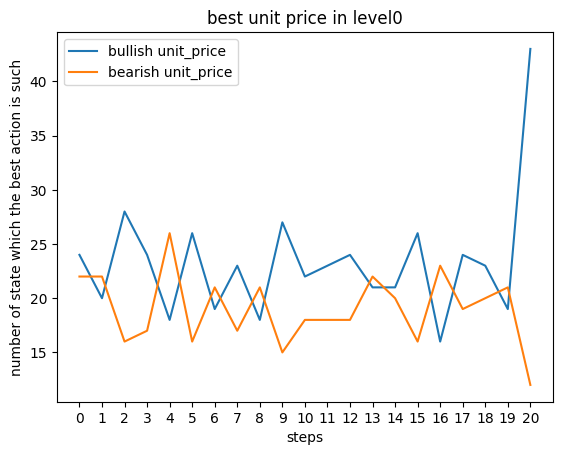

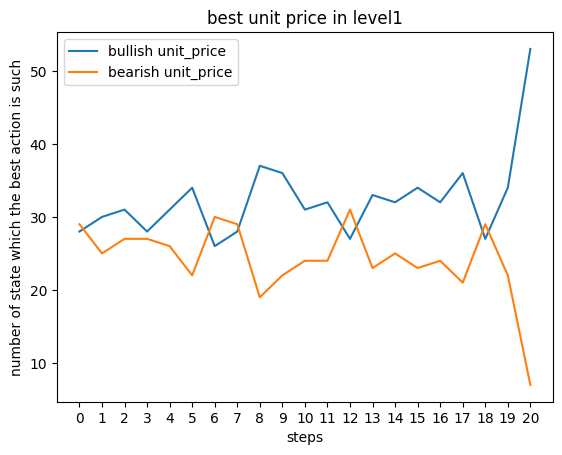

In [ ]:
step_level_to_unit_price_list = []
for step in range(21):
    step_level_to_unit_price_list.append([[0,0], [0,0]])
#print(level_unit_price_value_list)

for row in range(6006):
    if np.any(Q_value_matrix[row] > 0):
        step = calculate_step_for_Q_value_matrix(row)
        level = calculate_level_for_Q_value_matrix(row)
        act_value = get_random_max_col_index(Q_value_matrix, row)
        if act_value < len(choice_of_quantity):
            step_level_to_unit_price_list[step][level][0] += 1
        else:
            step_level_to_unit_price_list[step][level][1] += 1

for step in range(21):
    print("step =", step)
    for level in range(2):
        bullish_value = step_level_to_unit_price_list[step][level][1]
        bearish_value = step_level_to_unit_price_list[step][level][0]
        if bullish_value > bearish_value:
            result = "O"
        else:
            result = "X"
        print("  level =", level, "-> bullish unit_price =", bullish_value, "bearish unit_price =", bearish_value, result)

print(" ")

print()


print(" ")
#graph
step_list = list(range(21))
for level in range(2):
    bullish_list = []
    bearish_list = []
    for step in range(21):
        bullish_list.append(step_level_to_unit_price_list[step][level][1])
        bearish_list.append(step_level_to_unit_price_list[step][level][0])

    plt.plot(step_list, bullish_list, label="bullish unit_price")
    plt.plot(step_list, bearish_list, label="bearish unit_price")

    plt.title("best unit price in level" + str(level))
    plt.xlabel("steps")
    plt.ylabel("number of state which the best action is such")

    plt.xticks(step_list)

    plt.legend()

    plt.show()



####others

#####check learning rate?

In [ ]:
learning_rate_list = []
for row in range(6006):
    if np.any(Q_value_matrix[row, :] > 0):
        count = np.count_nonzero(Q_value_matrix[row, :])
        learning_rate_list.append(count / (len(choice_of_quantity) * 2))
average = sum(learning_rate_list) / len(learning_rate_list)
print("The average is: ", average)

The average is:  0.8370307988450468


#####check n_of_partners

In [ ]:
n_of_partners_list = [0] * 11
for row in range(6006):
    if np.any(Q_value_matrix[row, :] > 0):
        n_of_partners = calculate_n_of_partners_for_Q_value_matrix(row)
        n_of_partners_list[n_of_partners] += 1
print(n_of_partners_list)



[347, 321, 328, 411, 376, 295, 0, 0, 0, 0, 0]


#####check needs

In [ ]:
needs_list = []
for i in range(13):
    needs_list.append([i-2, 0])
for row in range(6006):
    if np.any(Q_value_matrix[row, :] > 0):
        needs_value = calculate_needs_for_Q_value_matrix(row)
        needs_list[needs_value][1] += 1
        if needs_value <= 2:
            print("row = ", row)
print(needs_list)
print(" ")

[[-2, 0], [-1, 0], [0, 0], [1, 198], [2, 198], [3, 211], [4, 220], [5, 228], [6, 225], [7, 214], [8, 200], [9, 196], [10, 188]]
 


######more research

In [ ]:
for row in range(6006):
    if np.any(Q_value_matrix[row, :] > 0):
        needs_value = calculate_needs_for_Q_value_matrix(row)
        if needs_value <= 2:
            step = calculate_step_for_Q_value_matrix(row)
            level = calculate_level_for_Q_value_matrix(row)
            n_of_partners = calculate_n_of_partners_for_Q_value_matrix(row)
            print("step, needs, level, n_of_partners = ", step, needs_value - 2, level, n_of_partners+1)
            print(Q_value_matrix[row])

#####check step

In [ ]:
step_list = []
for i in range(21):
    step_list.append([i, 0])
for row in range(6006):
    if np.any(Q_value_matrix[row, :] > 0):
        step = calculate_step_for_Q_value_matrix(row)
        #print("step = ", step)
        step_list[step][1] += 1
print(step_list)
print(" ")

[[0, 103], [1, 97], [2, 102], [3, 96], [4, 101], [5, 98], [6, 96], [7, 97], [8, 95], [9, 100], [10, 95], [11, 97], [12, 100], [13, 99], [14, 98], [15, 99], [16, 95], [17, 100], [18, 99], [19, 96], [20, 115]]
 


###don't treat unit_price

##analysis tscores

In [ ]:
#step = 19
TestAgent0730      = [1.16485, 1.06953, 1.07229, 1.10911, 1.0373, 1.10144, 1.03407, 1.10021, 1.10409, 1.06921]
AgentVSCforOneShot = [1.17118, 1.10149, 1.11673, 1.14117, 1.09822, 1.13407, 1.07162, 1.12167, 1.13282, 1.09787]
ForestAgent        = [1.14346, 0.902253, 1.08218, 1.06239, 0.980328, 1.07605, 1.02135, 1.11633, 1.15452, 1.08577]
PHLA               = [1.09476, 0.877981, 1.06005, 1.01449, 0.970456, 1.03855, 1.02007, 1.09725, 1.12755, 1.06844]
AgentSAS           = [1.09971, 0.878614, 1.05762, 1.01999, 0.966853, 1.04377, 1.01879, 1.09304, 1.12408, 1.06029]
NegoAgent          = [1.0696, 1.01394, 1.03724, 1.04863, 0.962362, 1.0392, 1.01334, 0.983379, 1.05121, 1.06473]
Shochan            = [1.14989, 1.03896, 1.10068, 1.0815, 1.00818, 1.12196, 0.965705, 1.09729, 1.14573, 1.06656]

In [ ]:
#step = 18
TestAgent0730      = [1.03284, 1.10495, 1.05004, 1.11861, 1.15096, 1.09223, 1.058, 1.09496, 1.15153, 1.08378]
AgentVSCforOneShot = [1.04924, 1.10691, 1.10376, 1.14334, 1.13529, 1.11498, 1.12332, 1.1426, 1.17314, 1.09468]
ForestAgent        = [1.00898, 1.06787, 1.0114, 1.09338, 1.11924, 1.08523, 1.04972, 1.0947, 1.1562, 1.0658]
PHLA               = [1.00639, 1.04825, 1.0042, 1.0923, 1.11615, 1.07205, 0.98963, 1.09215, 1.1187, 1.056]
AgentSAS           = [1.00482, 1.04888, 1.00518, 1.0872, 1.11114, 1.06817, 0.985545, 1.09789, 1.12183, 1.05554]
NegoAgent          = [1.0157, 0.979867, 1.05956, 1.00095, 1.07997, 1.04985, 1.02275, 1.036, 1.00531, 0.988277]
Shochan            = [0.989669, 1.06978, 1.05351, 1.11563, 1.07946, 1.08902, 1.0796, 1.10589, 1.17617, 1.08791]

In [ ]:
print("average of tscores TestAgent0730      =", sum(TestAgent0730)/len(TestAgent0730))
print("average of tscores AgentVSCforOneShot =", sum(AgentVSCforOneShot)/len(AgentVSCforOneShot))
print("average of tscores ForestAgent        =", sum(ForestAgent)/len(ForestAgent))
print("average of tscores PHLA               =", sum(PHLA)/len(PHLA))
print("average of tscores AgentSAS           =", sum(AgentSAS)/len(AgentSAS))
print("average of tscores NegoAgent          =", sum(NegoAgent)/len(NegoAgent))
print("average of tscores Shochan            =", sum(Shochan)/len(Shochan))

average of tscores TestAgent0730      = 1.08621
average of tscores AgentVSCforOneShot = 1.1186840000000002
average of tscores ForestAgent        = 1.0624631
average of tscores PHLA               = 1.0369597000000002
average of tscores AgentSAS           = 1.0362756999999998
average of tscores NegoAgent          = 1.0283631
average of tscores Shochan            = 1.0776454999999998


In [ ]:
print("average of tscores TestAgent0730      =", sum(TestAgent0730)/len(TestAgent0730))
print("average of tscores AgentVSCforOneShot =", sum(AgentVSCforOneShot)/len(AgentVSCforOneShot))
print("average of tscores ForestAgent        =", sum(ForestAgent)/len(ForestAgent))
print("average of tscores PHLA               =", sum(PHLA)/len(PHLA))
print("average of tscores AgentSAS           =", sum(AgentSAS)/len(AgentSAS))
print("average of tscores NegoAgent          =", sum(NegoAgent)/len(NegoAgent))
print("average of tscores Shochan            =", sum(Shochan)/len(Shochan))

average of tscores TestAgent0730      = 1.0937899999999998
average of tscores AgentVSCforOneShot = 1.118726
average of tscores ForestAgent        = 1.0752519999999999
average of tscores PHLA               = 1.059582
average of tscores AgentSAS           = 1.0586195
average of tscores NegoAgent          = 1.0238234
average of tscores Shochan            = 1.0846639


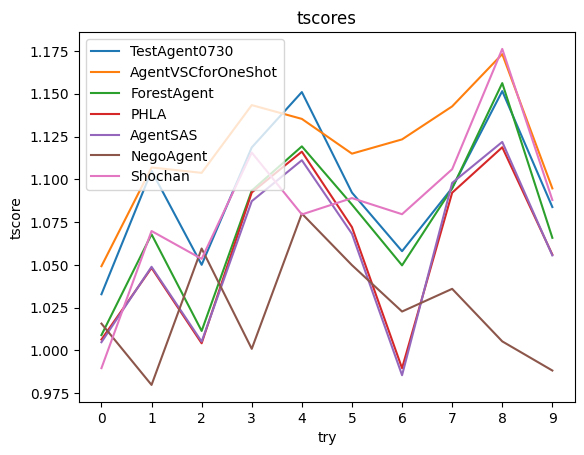

In [ ]:
#graph
try_list = list(range(10))


plt.plot(try_list, TestAgent0730, label="TestAgent0730")
plt.plot(try_list, AgentVSCforOneShot, label="AgentVSCforOneShot")
plt.plot(try_list, ForestAgent, label="ForestAgent")
plt.plot(try_list, PHLA, label="PHLA")
plt.plot(try_list, AgentSAS, label="AgentSAS")
plt.plot(try_list, NegoAgent, label="NegoAgent")
plt.plot(try_list, Shochan, label="Shochan")

plt.title("tscores")
plt.xlabel("try")
plt.ylabel("tscore")

plt.xticks(try_list)

plt.legend()

plt.show()

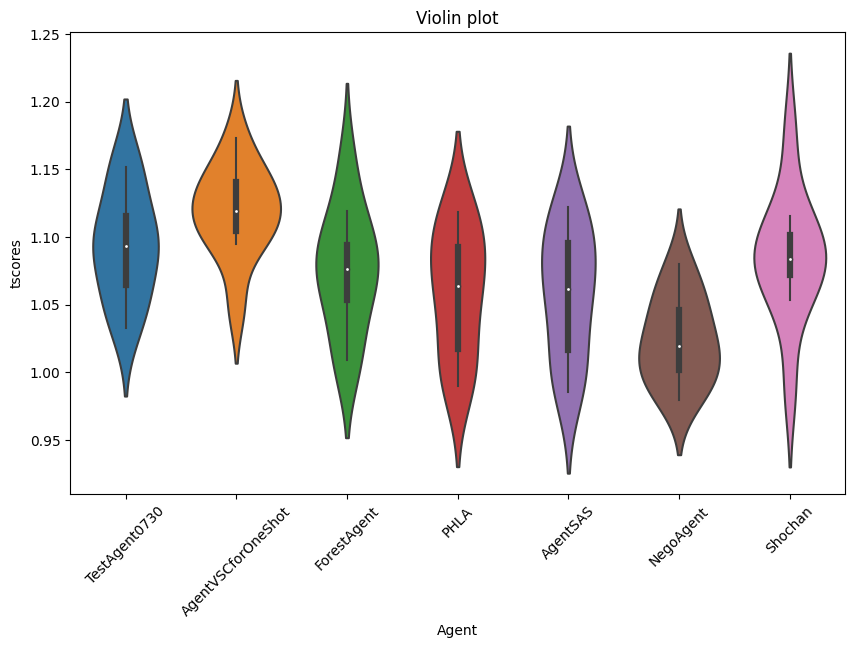

In [ ]:
# create a dataframe from the lists
data = pd.DataFrame({
    "TestAgent0730": TestAgent0730,
    "AgentVSCforOneShot": AgentVSCforOneShot,
    "ForestAgent": ForestAgent,
    "PHLA": PHLA,
    "AgentSAS": AgentSAS,
    "NegoAgent": NegoAgent,
    "Shochan": Shochan
})

# "melt" the dataset to convert it into long form
data_melted = data.melt(var_name='Agent', value_name='tscores')

# create the violinplot
plt.figure(figsize=(10,6))
sns.violinplot(x='Agent', y='tscores', data=data_melted)
plt.title("Violin plot")

# rotate x-axis labels for better visibility
plt.xticks(rotation=45)

plt.show()

In [ ]:
def analysis_statistics(data):
    # データの例
    #data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

    # 統計量を計算
    mean = np.mean(data)
    min_val = np.min(data)
    q1 = np.percentile(data, 25)
    median = np.median(data)
    q3 = np.percentile(data, 75)
    max_val = np.max(data)

    # 結果を出力
    #print("name =", str(data))
    print(f"Mean: {mean}")
    print(f"Min: {min_val}")
    print(f"First quartile: {q1}")
    print(f"Median (Second quartile): {median}")
    print(f"Third quartile: {q3}")
    print(f"Max: {max_val}")
    print(" ")

print("TestAgent0730")
analysis_statistics(TestAgent0730)
print("AgentVSCforOneShot")
analysis_statistics(AgentVSCforOneShot)
print("ForestAgent")
analysis_statistics(ForestAgent)
print("PHLA")
analysis_statistics(PHLA)
print("AgentSAS")
analysis_statistics(AgentSAS)
print("NegoAgent")
analysis_statistics(NegoAgent)
print("Shochan")
analysis_statistics(Shochan)

TestAgent0730
Mean: 1.08621
Min: 1.03407
First quartile: 1.06929
Median (Second quartile): 1.08625
Third quartile: 1.1034275
Max: 1.16485
 
AgentVSCforOneShot
Mean: 1.1186840000000002
Min: 1.07162
First quartile: 1.0990375000000001
Median (Second quartile): 1.1192
Third quartile: 1.1337575
Max: 1.17118
 
ForestAgent
Mean: 1.0624631
Min: 0.902253
First quartile: 1.03161
Median (Second quartile): 1.0791149999999998
Third quartile: 1.10869
Max: 1.15452
 
PHLA
Mean: 1.0369597000000002
Min: 0.877981
First quartile: 1.015885
Median (Second quartile): 1.0493000000000001
Third quartile: 1.08818
Max: 1.12755
 
AgentSAS
Mean: 1.0362757
Min: 0.878614
First quartile: 1.01909
Median (Second quartile): 1.0506950000000002
Third quartile: 1.0848525
Max: 1.12408
 
NegoAgent
Mean: 1.0283631
Min: 0.962362
First quartile: 1.01349
Median (Second quartile): 1.03822
Third quartile: 1.050565
Max: 1.0696
 
Shochan
Mean: 1.0776454999999998
Min: 0.965705
First quartile: 1.04586
Median (Second quartile): 1.089395

##analysis for final needs

###function

In [ ]:
def load_data_from_csv(filename):
    data = []
    with open(filename, 'r') as f:
        reader = csv.reader(f)
        for row in reader:
            # 各要素をint型に変換し、空文字列の場合は無視する
            row_data = [int(x) for x in row if x]
            if row_data:  # row_dataが空でなければ
                data.extend(row_data)
    return data

def np_counter(np_data):
    # Counterオブジェクトを作成します
    counter = Counter(np_data)

    # 各要素とその出現回数を出力します
    for element, count in counter.items():
        print(f"Element: {element}, Count: {count}")

###import

final needs of TestAgent0730
level0


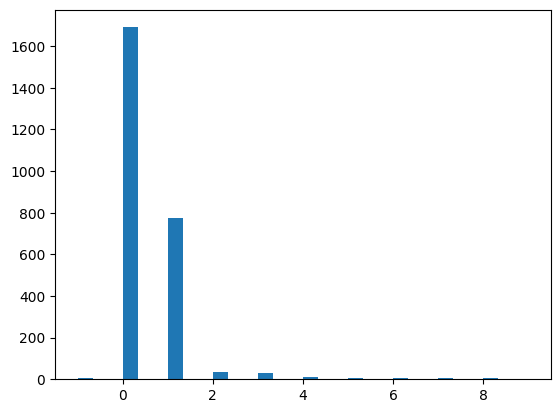

>0 mean = 0.43623639191290825
<0 mean = -0.0027216174183514776
 
level1


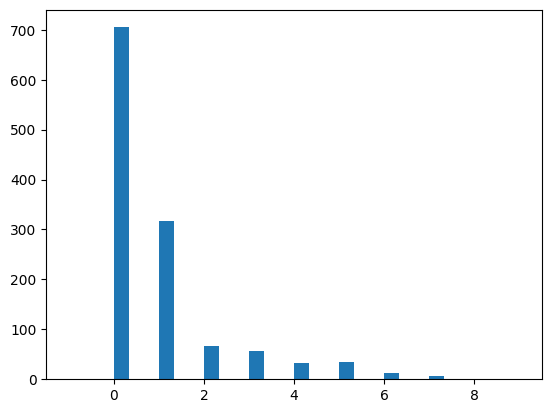

>0 mean = 0.8656957928802589
<0 mean = -0.0008090614886731392
 
 
 
final needs of AgentVSCforOneShot
level0


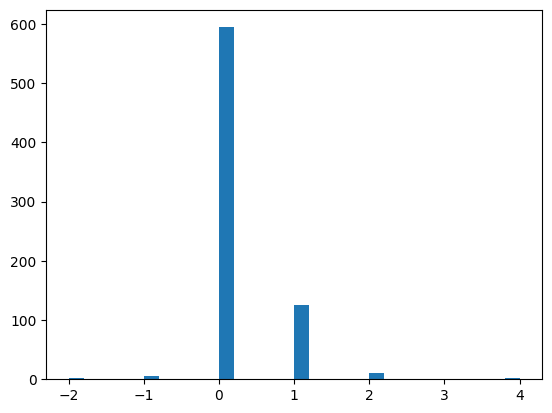

>0 mean = 0.21592442645074225
<0 mean = -0.01349527665317139
 
level1


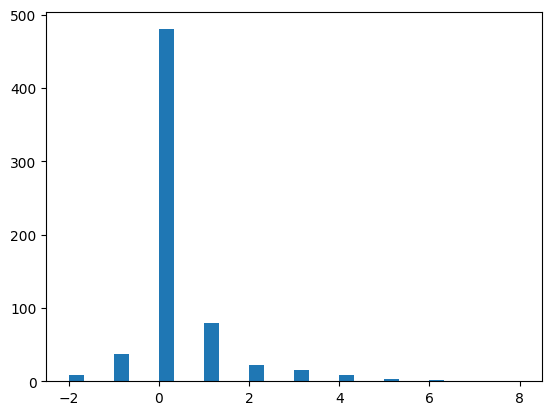

>0 mean = 0.3592085235920852
<0 mean = -0.0837138508371385
 


In [ ]:
list_final_needs_set_TestAgent0730 = load_data_from_csv('final_needs_set_TestAgent0730.csv')
print("final needs of TestAgent0730")
long = len(list_final_needs_set_TestAgent0730)
each_long = long // 2
level0_final_needs_set_TestAgent0730 = []
level1_final_needs_set_TestAgent0730 = []
for i in range(each_long):
    if list_final_needs_set_TestAgent0730[2*i+1] == 0:
        level0_final_needs_set_TestAgent0730.append(list_final_needs_set_TestAgent0730[2*i])
    else:
        level1_final_needs_set_TestAgent0730.append(list_final_needs_set_TestAgent0730[2*i])

np_level0_final_needs_set_TestAgent0730 = np.array(level0_final_needs_set_TestAgent0730)
np_level1_final_needs_set_TestAgent0730 = np.array(level1_final_needs_set_TestAgent0730)

print("level0")
plt.hist(np_level0_final_needs_set_TestAgent0730, bins=30)
plt.show()
if False:
    abs_data = np.abs(np_level0_final_needs_set_TestAgent0730)
    mean_abs_data = np.mean(abs_data)
    print("mean of absolute of final_needs =", mean_abs_data)
data = np_level0_final_needs_set_TestAgent0730
print(">0 mean =", np.sum(data[data > 0]) / data.size)
print("<0 mean =", np.sum(data[data < 0]) / data.size)
print(" ")

print("level1")
plt.hist(np_level1_final_needs_set_TestAgent0730, bins=30)
plt.show()
if False:
    abs_data = np.abs(np_level1_final_needs_set_TestAgent0730)
    mean_abs_data = np.mean(abs_data)
    print("mean of absolute of final_needs =", mean_abs_data)
data = np_level1_final_needs_set_TestAgent0730
print(">0 mean =", np.sum(data[data > 0]) / data.size)
print("<0 mean =", np.sum(data[data < 0]) / data.size)
print(" ")

print(" ")
print(" ")



list_final_needs_set_AgentVSCforOneShot = load_data_from_csv('final_needs_set_AgentVSCforOneShot.csv')
print("final needs of AgentVSCforOneShot")
long = len(list_final_needs_set_AgentVSCforOneShot)
each_long = long // 2
level0_final_needs_set_AgentVSCforOneShot = []
level1_final_needs_set_AgentVSCforOneShot = []
for i in range(each_long):
    if list_final_needs_set_AgentVSCforOneShot[2*i+1] == 0:
        level0_final_needs_set_AgentVSCforOneShot.append(list_final_needs_set_AgentVSCforOneShot[2*i])
    else:
        level1_final_needs_set_AgentVSCforOneShot.append(list_final_needs_set_AgentVSCforOneShot[2*i])

np_level0_final_needs_set_AgentVSCforOneShot = np.array(level0_final_needs_set_AgentVSCforOneShot)
np_level1_final_needs_set_AgentVSCforOneShot = np.array(level1_final_needs_set_AgentVSCforOneShot)

print("level0")
plt.hist(np_level0_final_needs_set_AgentVSCforOneShot, bins=30)
plt.show()
if False:
    abs_data = np.abs(np_level0_final_needs_set_AgentVSCforOneShot)
    mean_abs_data = np.mean(abs_data)
    print("mean of absolute of final_needs =", mean_abs_data)
data = np_level0_final_needs_set_AgentVSCforOneShot
print(">0 mean =", np.sum(data[data > 0]) / data.size)
print("<0 mean =", np.sum(data[data < 0]) / data.size)
print(" ")

print("level1")
plt.hist(np_level1_final_needs_set_AgentVSCforOneShot, bins=30)
plt.show()
if False:
    abs_data = np.abs(np_level1_final_needs_set_AgentVSCforOneShot)
    mean_abs_data = np.mean(abs_data)
    print("mean of absolute of final_needs =", mean_abs_data)
data = np_level1_final_needs_set_AgentVSCforOneShot
print(">0 mean =", np.sum(data[data > 0]) / data.size)
print("<0 mean =", np.sum(data[data < 0]) / data.size)
print(" ")

In [ ]:
print("TestAgent0730 in level 0")
np_counter(np_level0_final_needs_set_TestAgent0730)
print(" ")

print("TestAgent0730 in level 1")
np_counter(np_level1_final_needs_set_TestAgent0730)
print(" ")

print("AgentVSCforOneShot in level 0")
np_counter(np_level0_final_needs_set_AgentVSCforOneShot)
print(" ")

print("AgentVSCforOneShot in level 1")
np_counter(np_level1_final_needs_set_AgentVSCforOneShot)
print(" ")

TestAgent0730 in level 0
Element: 2, Count: 36
Element: 0, Count: 1691
Element: 7, Count: 4
Element: 1, Count: 774
Element: -1, Count: 7
Element: 4, Count: 13
Element: 3, Count: 31
Element: 9, Count: 1
Element: 6, Count: 4
Element: 5, Count: 6
Element: 8, Count: 5
 
TestAgent0730 in level 1
Element: 0, Count: 705
Element: 2, Count: 67
Element: 4, Count: 33
Element: 6, Count: 13
Element: 9, Count: 1
Element: 3, Count: 56
Element: 1, Count: 317
Element: 5, Count: 35
Element: 7, Count: 7
Element: 8, Count: 1
Element: -1, Count: 1
 
AgentVSCforOneShot in level 0
Element: -2, Count: 2
Element: 0, Count: 594
Element: 1, Count: 125
Element: 2, Count: 10
Element: -1, Count: 6
Element: 4, Count: 3
Element: 3, Count: 1
 
AgentVSCforOneShot in level 1
Element: 0, Count: 480
Element: 1, Count: 80
Element: 5, Count: 3
Element: 2, Count: 22
Element: 3, Count: 15
Element: 4, Count: 8
Element: -1, Count: 37
Element: 8, Count: 1
Element: -2, Count: 9
Element: 6, Count: 2
 
